In [2]:
import tensorflow as tf

In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.0.0a0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\programdata\anaconda3\lib\site-packages
Requires: google-pasta, numpy, wheel, tb-nightly, gast, keras-preprocessing, grpcio, absl-py, protobuf, keras-applications, six, astor, termcolor, tf-estimator-nightly
Required-by: 
Note: you may need to restart the kernel to use updated packages.


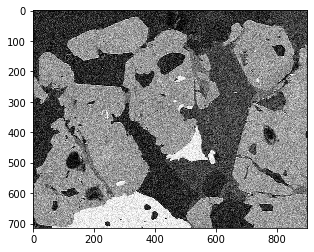

In [11]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np

img = io.imread("C:/Users/Haroon/Desktop/Deep-Learning-Theory/BSE_Google_noisy.jpg")
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

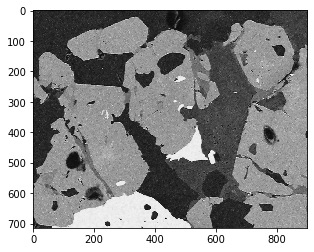

In [10]:
  

#Let's clean the noise using edge preserving filter.
#As mentioned in previous tutorial, my favorite is NLM

from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

float_img = img_as_float(img)
sigma_est = np.mean(estimate_sigma(float_img, multichannel=True))


denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=False, 
                               patch_size=5, patch_distance=3, multichannel=True)
                           
denoise_img_as_8byte = img_as_ubyte(denoise_img)
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')



(array([0.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 5.000e+00,
        8.000e+00, 1.200e+01, 1.000e+01, 1.600e+01, 1.000e+01, 2.200e+01,
        3.700e+01, 6.200e+01, 1.230e+02, 2.470e+02, 3.960e+02, 5.780e+02,
        7.250e+02, 8.450e+02, 8.500e+02, 8.710e+02, 8.270e+02, 8.830e+02,
        9.720e+02, 1.086e+03, 1.370e+03, 1.753e+03, 2.221e+03, 2.920e+03,
        3.627e+03, 4.440e+03, 5.170e+03, 5.964e+03, 6.832e+03, 7.475e+03,
        8.266e+03, 8.796e+03, 8.996e+03, 9.177e+03, 9.017e+03, 8.851e+03,
        8.256e+03, 7.577e+03, 7.024e+03, 6.520e+03, 5.540e+03, 4.808e+03,
        4.283e+03, 3.755e+03, 3.459e+03, 3.136e+03, 2.905e+03, 2.635e+03,
        2.694e+03, 2.671e+03, 2.603e+03, 2.710e+03, 2.817e+03, 3.078e+03,
        2.999e+03, 3.173e+03, 3.294e+03, 3.355e+03, 3.573e+03, 3.685e+03,
        3.770e+03, 3.733e+03, 3.732e+03, 3.622e+03, 3.502e+03, 3.480e+03,
        3.354e+03, 3.093e+03, 2.859e+03, 2.713e+03, 2.586e+03, 2.445e+03,
        2.178e+03, 1.937e+03, 1.886e+0

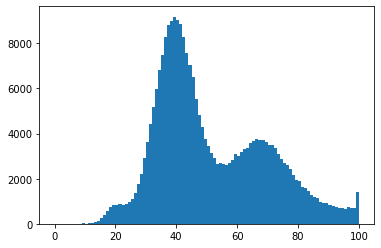

In [14]:
plt.hist(denoise_img_as_8byte.flat, bins=100, range=(0,100))  #.flat returns the flattened numpy array (1D)

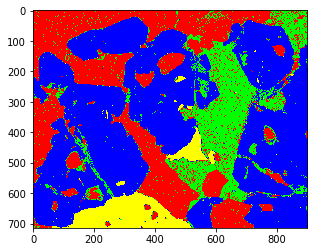

In [15]:
segm1 = (denoise_img_as_8byte <= 57)
segm2 = (denoise_img_as_8byte > 57) & (denoise_img_as_8byte <= 110)
segm3 = (denoise_img_as_8byte > 110) & (denoise_img_as_8byte <= 210)
segm4 = (denoise_img_as_8byte > 210)

#How to show all these images in single visualization?
#Construct a new empty image with same shape as original except with 3 layers.
#print(median_img.shape[0])
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)
all_segments[segm3] = (0,0,1)
all_segments[segm4] = (1,1,0)
plt.imshow(all_segments)

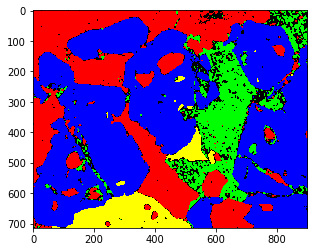

In [16]:
#Lot of yellow dots, red dots and stray dots. how to clean
#We can use binary opening and closing operations. Open takes care of isolated pixels within the window
#Closing takes care of isolated holes within the defined window

from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but 714, 901, 3

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)  #All the noise should be cleaned now